#Principal Component Analysis

Stanford CS229 - Machine Learning by Andrew Ng. Programming exercise 7 with solutions.

Please check out [the repository on GitHub](https://github.com/rickwierenga/CS229-Python/). If you spot any mistakes or inconcistencies, please create an issue. For questions you can find me on Twitter: [@rickwierenga](https://twitter.com/rickwierenga). Starring the project on GitHub means a ton to me!

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import scipy.io as sio
%matplotlib inline

## Principal Content Analysis
---
In this exercise, you will use principal component analysis (PCA) to perform dimensionality reduction. You will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset.

### Dimension reduction on example dataset

Before using PCA it's important to use feature scaling to make sure every feature 'is of equal importance' when runnig PCA.

In [ ]:
import scipy
data=scipy.io.loadmat("/content/sample_data/ex7data1.mat")

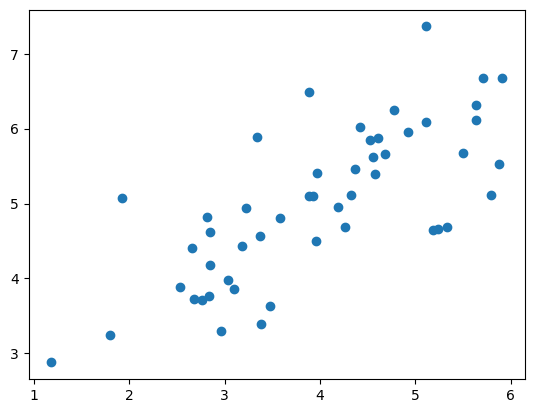

In [ ]:

X = data["X"]
plt.plot(X[:, 0], X[:, 1], 'o')

In [ ]:
def normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    return (X-mu)/sigma, mu, sigma

In [ ]:
X_norm, mu, sigma = normalize_features(X)

PCA consists of two steps: first you compute the covariance matrix of the data given by:
$$ \Sigma = \frac{1}{m}X^TX$$

. Second you compute the [eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of this matrix using numpy: `U, S, V = np.linalg.svd(Sigma)`.

In [ ]:
def pca(X):
    m = len(X)
    Sigma = (1/m) * X.T @ X
    U, S, _ = np.linalg.svd(Sigma)
    return U, S

The following code should return approximately $\begin{bmatrix} -0.707 && -0.707\end{bmatrix}$.

In [ ]:
U, S = pca(X_norm)
U[0, 0], U[1, 0]

(-0.7071067811865474, -0.7071067811865474)

In [ ]:
def project_data(X, U, K):
    Ureduce = U[:, :K]
    z = X @ Ureduce
    return z

The following should return approximately $1.496$.

In [ ]:
Z = project_data(X_norm, U, K=1)
Z[0]

array([1.49631261])

**Exercise**: Implement `recover_data`.

In [ ]:
def recover_data(Z, U, K):
    Ureduce = U[:, :K]
    return Ureduce @ Z.T

Text(0.5, 1.0, 'Recoverd data')

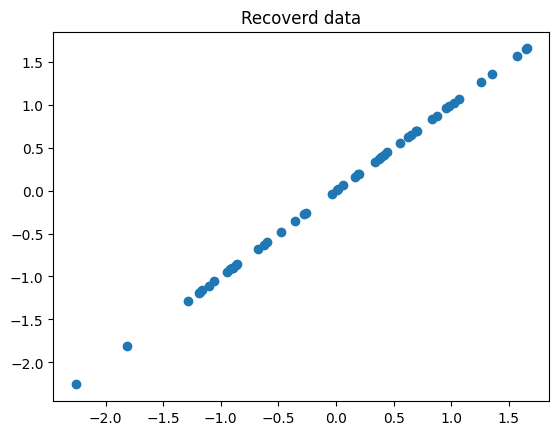

In [ ]:
X_rec = recover_data(Z, U, K=1)
plt.plot(X_rec[0, :], X_rec[1, :], 'o')
plt.title("Recoverd data")